In [1]:
!pip install kaggle

In [2]:
!pip install -q kaggle

In [32]:
import os
from google.colab import userdata

#Get the token from Colab Secrets
try:
    os.environ["KAGGLE_API_TOKEN"] = userdata.get('KAGGLE_API_TOKEN')
    print("Token loaded successfully.")
except Exception as e:
    print("Could not load token")

# 2. Verify it works
!kaggle competitions list | head -n 5

Token loaded successfully.
ref                                                                              deadline             category          reward  teamCount  userHasEntered  
-------------------------------------------------------------------------------  -------------------  ---------  -------------  ---------  --------------  
https://www.kaggle.com/competitions/ai-mathematical-olympiad-progress-prize-3    2026-04-15 23:59:00  Featured   2,207,152 Usd       1411           False  
https://www.kaggle.com/competitions/passenger-screening-algorithm-challenge      2017-12-15 23:59:00  Featured   1,500,000 Usd        518           False  
https://www.kaggle.com/competitions/zillow-prize-1                               2018-01-10 15:59:00  Featured   1,200,000 Usd       3770           False  


In [33]:
!pip uninstall -y kaggle
!pip install -q kaggle

Found existing installation: kaggle 1.8.3
Uninstalling kaggle-1.8.3:
  Successfully uninstalled kaggle-1.8.3


In [5]:
!pip install -q kaggle

In [6]:
!kaggle datasets list | head -n 5

ref                                                               title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
neurocipher/heartdisease                                          Heart Disease                                             3491  2025-12-11 15:29:14.327000           2114        295                1  
serkantysz/550k-spotify-songs-audio-lyrics-and-genres             550K Spotify Songs: Audio, Lyrics & Genres           246075351  2026-01-02 20:43:03.863000              0         36                1  
rockyt07/social-media-user-analysis                               Social Media User Analysis                           247842357  2026-01-14 02:28:41.970000              0         67          

In [7]:
!kaggle datasets download -d emmarex/plantdisease

Dataset URL: https://www.kaggle.com/datasets/emmarex/plantdisease
License(s): unknown
 99% 649M/658M [00:03<00:00, 222MB/s]
100% 658M/658M [00:03<00:00, 190MB/s]


In [8]:
!ls

plantdisease.zip  sample_data


In [9]:
!unzip -q plantdisease.zip
!ls

plantdisease.zip  plantvillage	PlantVillage  sample_data


In [10]:
!ls PlantVillage | head

Pepper__bell___Bacterial_spot
Pepper__bell___healthy
Potato___Early_blight
Potato___healthy
Potato___Late_blight
Tomato_Bacterial_spot
Tomato_Early_blight
Tomato_healthy
Tomato_Late_blight
Tomato_Leaf_Mold


In [11]:
!ls PlantVillage/Tomato_healthy | head


000146ff-92a4-4db6-90ad-8fce2ae4fddd___GH_HL Leaf 259.1.JPG
000bf685-b305-408b-91f4-37030f8e62db___GH_HL Leaf 308.1.JPG
0031da2a-8edd-468f-a8b1-106657717a32___RS_HL 0105.JPG
003944fc-3b99-4a0f-9ed4-0e07352fd8b3___RS_HL 9844.JPG
00bce074-967b-4d50-967a-31fdaa35e688___RS_HL 0223.JPG
014b5e19-7917-4d76-b632-b5dd31d999ec___RS_HL 9640.JPG
01700b46-3800-46c6-ab81-09a5f50af525___RS_HL 0108.JPG
0172e56c-8bb8-4e75-8ac7-509df81393e8___RS_HL 0580.JPG
017a4026-813a-4983-887a-4052bb78c397___RS_HL 0218.JPG
0184dc6b-bfc1-4515-ac59-bbadaf524e1a___GH_HL Leaf 422.1.JPG


#Imports & Data Preparation

In [12]:
import os
import shutil

BASE_DIR = "PlantVillage"
WORK_DIR = "plant_data"

TRAIN_DIR = os.path.join(WORK_DIR, "train")
VAL_DIR = os.path.join(WORK_DIR, "val")

classes = {
    "Tomato_healthy": "Tomato_Healthy",
    "Tomato_Late_blight": "Tomato_Late_Blight",
    "Potato___Early_blight": "Potato_Early_Blight",
    "Pepper__bell___Bacterial_spot": "Pepper_Bacterial_Spot"
}

for split in [TRAIN_DIR, VAL_DIR]:
    for cls in classes.values():
        os.makedirs(os.path.join(split, cls), exist_ok=True)

#Split the Dataset

In [13]:
import random

def split_and_copy(src_folder, dst_train, dst_val, split_ratio=0.8):
    images = os.listdir(src_folder)
    random.shuffle(images)

    split_idx = int(len(images) * split_ratio)
    train_imgs = images[:split_idx]
    val_imgs = images[split_idx:]

    for img in train_imgs:
        shutil.copy(
            os.path.join(src_folder, img),
            os.path.join(dst_train, img)
        )

    for img in val_imgs:
        shutil.copy(
            os.path.join(src_folder, img),
            os.path.join(dst_val, img)
        )

for src, dst in classes.items():
    split_and_copy(
        os.path.join(BASE_DIR, src),
        os.path.join(TRAIN_DIR, dst),
        os.path.join(VAL_DIR, dst)
    )


In [14]:
#Verify Image Counts

def count_image(path):
  for cls in sorted(os.listdir(path)):
    print(f"{cls}: {len(os.listdir(os.path.join(path, cls)))}")

print("TRAIN: ")
count_image(TRAIN_DIR)

print("\nVAL: ")
count_image(VAL_DIR)

TRAIN: 
Pepper_Bacterial_Spot: 797
Potato_Early_Blight: 800
Tomato_Healthy: 1272
Tomato_Late_Blight: 1527

VAL: 
Pepper_Bacterial_Spot: 200
Potato_Early_Blight: 200
Tomato_Healthy: 319
Tomato_Late_Blight: 382


#Load Datasets

Found 4396 files belonging to 4 classes.
Found 1101 files belonging to 4 classes.
['Pepper_Bacterial_Spot', 'Potato_Early_Blight', 'Tomato_Healthy', 'Tomato_Late_Blight']


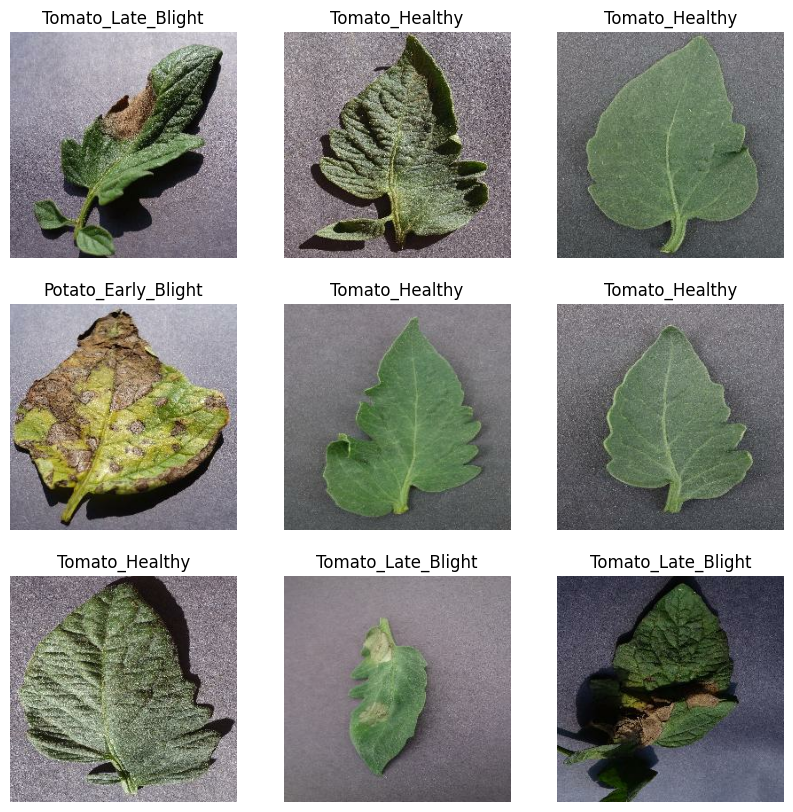

In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt

IMAGE_SIZE = (256, 256)
BATCH_SIZE = 32


train_dataset = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    image_size=(IMAGE_SIZE[0],IMAGE_SIZE[1]),
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    shuffle=True
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    VAL_DIR,
    image_size=(IMAGE_SIZE[0],IMAGE_SIZE[1]),
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    shuffle=True
)

CLASS_NAME = train_dataset.class_names
print(CLASS_NAME)

plt.figure(figsize=(10,10))

for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    label_index = tf.argmax(labels[i], axis=-1)
    plt.title(CLASS_NAME[label_index])
    plt.axis("off")

plt.show()

#Build CNN

In [16]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(256, 256, 3)),

    layers.Conv2D(32, 3, activation="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, activation="relu"),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(4, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,839,492 (56.61 MB)

 Trainable params: 14,839,492 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

checkpoint = ModelCheckpoint(
    "best_modal.keras",
    monitor="val_accuracy",
    save_best_only=True
)

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    train_dataset,
    validation_data = val_dataset,
    epochs = 40,
    callbacks = [checkpoint, early_stop]
)

Epoch 1/40
138/138 ━━━━━━━━━━━━━━━━━━━━ 26s 122ms/step - accuracy: 0.6226 - loss: 1.1707 - val_accuracy: 0.9137 - val_loss: 0.2219
Epoch 2/40
138/138 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - accuracy: 0.9218 - loss: 0.2061 - val_accuracy: 0.8756 - val_loss: 0.3645
Epoch 3/40
138/138 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - accuracy: 0.9393 - loss: 0.1848 - val_accuracy: 0.9428 - val_loss: 0.1555
Epoch 4/40
138/138 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - accuracy: 0.9741 - loss: 0.0822 - val_accuracy: 0.9564 - val_loss: 0.1244
Epoch 5/40
138/138 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - accuracy: 0.9832 - loss: 0.0460 - val_accuracy: 0.9591 - val_loss: 0.1105
Epoch 6/40
138/138 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - accuracy: 0.9898 - loss: 0.0313 - val_accuracy: 0.9637 - val_loss: 0.1062
Epoch 7/40
138/138 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.9903 - loss: 0.0291 - val_accuracy: 0.9619 - val_loss: 0.1360
Epoch 8/40
138/138 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.9918 - loss: 0.0269 - 

In [23]:
scores = model.evaluate(val_dataset)

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9633 - loss: 0.1022


In [24]:
scores

[0.10622871667146683, 0.9636694192886353]

In [25]:
history.params

{'verbose': 'auto', 'epochs': 40, 'steps': 138}

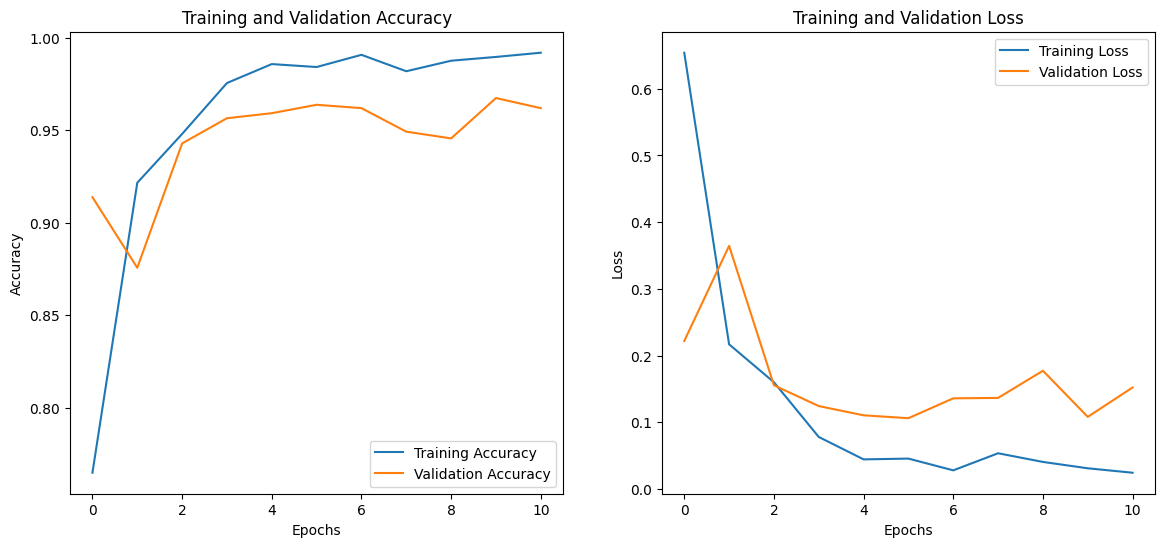

In [26]:
import matplotlib.pyplot as plt

# 1. Extract the metrics from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# 2. Define the range of epochs (ensures x-axis matches actual epochs run)
epochs_range = range(len(acc))

# 3. Setup the plot area
plt.figure(figsize=(14, 6))

# --- Plot Accuracy ---
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# --- Plot Loss ---
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

In [27]:
# Save the model to a single file
model.save('best_modal.keras')

print("Model saved successfully!")

Model saved successfully!


#Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


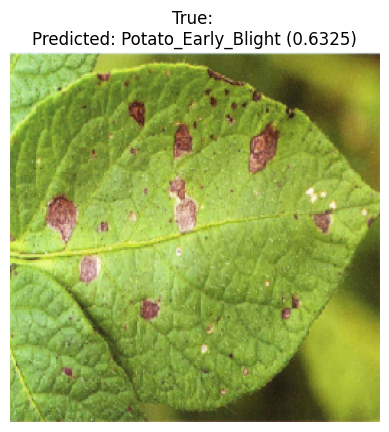

In [38]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os

def predict_image(img_path):
    # Load the image
    img = image.load_img(img_path, target_size=(IMAGE_SIZE[0], IMAGE_SIZE[1]))

    # Convert to array (Values are 0-255)
    # DO NOT divide by 255 here, because your model has layers.Rescaling(1./255)
    img_array = image.img_to_array(img)

    # Add batch dimension (1, 256, 256, 3)
    img_batch = np.expand_dims(img_array, axis=0)

    # Predict
    pred = model.predict(img_batch)
    idx = np.argmax(pred)
    confidence = pred[0][idx]

    folder_name = os.path.basename(os.path.dirname(img_path))

    # Display
    # cast to uint8 for display (expects 0-255)
    plt.imshow(img_array.astype("uint8"))
    plt.axis("off")
    # Fixed variable name from CLASS_NAMES to CLASS_NAME
    plt.title(f"True: {folder_name}\nPredicted: {CLASS_NAME[idx]} ({confidence:.4f})")
    plt.show()

# Test with an image
test_image_path = "1_fIG.png"
if os.path.exists(test_image_path):
    predict_image(test_image_path)
else:
    print("Image not found, check path.")

In [34]:
!ls PlantVillage/Potato___Early_blight | head


001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG
002a55fb-7a3d-4a3a-aca8-ce2d5ebc6925___RS_Early.B 8170.JPG
009c8c31-f22d-4ffd-8f16-189c6f06c577___RS_Early.B 7885.JPG
00d8f10f-5038-4e0f-bb58-0b885ddc0cc5___RS_Early.B 8722.JPG
0182e991-97f0-4805-a1f7-6e1b4306d518___RS_Early.B 7015.JPG
02578b86-b234-4ac0-9bc3-691b5610e2bf___RS_Early.B 7562.JPG
0267d4ca-522e-4ca0-b1a2-ce925e5b54a2___RS_Early.B 7020.JPG
028f9b73-142f-499a-9c7b-d7c1ed5e5506___RS_Early.B 8546.JPG
034959c1-f1e8-4a79-a6d5-3c1d14efa2f3___RS_Early.B 7136.JPG
03b0d3c1-b5b0-48f4-98aa-f8904670290f___RS_Early.B 7051.JPG
